<a href="https://colab.research.google.com/github/CamPaiva/Airbnb_Amsterdam/blob/main/IsadoraPaiva_PythonAdvanced_AirbnbProject_FinalDelivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Python for Data Science - Inside Airbnb Data (Amsterdam)
*   Name: Isadora Campregher Paiva
*   Group: Advanced (Mentor: Manuel)



In [78]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import seaborn as sns
!pip install calmap
import calmap
import folium
from folium import plugins
from folium.plugins import HeatMap
from geopy import Point
from geopy.distance import distance
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 4 Exploratory Data Analysis
# 4.1 Visualizing Apartment Availability
# 4.1.1 Import, Clean and Transform the Data

In [79]:
#Load Amstersam information into a dataframe
amst = pd.read_csv("https://drive.google.com/uc?id=1s4AK8z3tz-lu1Uf_XEZX3Oq3j1kn8yL7", compression = "gzip")

In [80]:
# See what it looks like
amst.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,489418,2021-09-07,f,$79.00,$79.00,2.0,14.0
1,2818,2021-09-07,f,$59.00,$59.00,3.0,1125.0
2,2818,2021-09-08,f,$59.00,$59.00,3.0,1125.0
3,2818,2021-09-09,f,$59.00,$59.00,3.0,1125.0
4,2818,2021-09-10,f,$59.00,$59.00,3.0,1125.0


In [81]:
amst.dtypes
# We need to clean up the data and change the data types that are objects into appropriate types

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [82]:
#From price and adjusted_price: remove dollar signs
amst["price"] = amst["price"].str.strip("$")
amst["adjusted_price"] = amst["adjusted_price"].str.strip("$")

In [83]:
# There was an error when I tried to transform the prices into floats because of a comma, so replace that with nothing and then convert
amst["price"] = amst["price"].str.replace(",","").astype(float)
amst["adjusted_price"] = amst["adjusted_price"].str.replace(",","").astype(float)

In [84]:
# Replace availability column values with booleans
amst["available"] = amst["available"].replace("f", False).replace("t", True)

In [85]:
# Turn date column into dates
amst['date'] = pd.to_datetime(amst['date'])

In [86]:
# Check if it worked by calling for the datatypes in the dataframe
amst.dtypes

listing_id                 int64
date              datetime64[ns]
available                   bool
price                    float64
adjusted_price           float64
minimum_nights           float64
maximum_nights           float64
dtype: object

In [87]:
amst # looking good!

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,489418,2021-09-07,False,79.0,79.0,2.0,14.0
1,2818,2021-09-07,False,59.0,59.0,3.0,1125.0
2,2818,2021-09-08,False,59.0,59.0,3.0,1125.0
3,2818,2021-09-09,False,59.0,59.0,3.0,1125.0
4,2818,2021-09-10,False,59.0,59.0,3.0,1125.0
...,...,...,...,...,...,...,...
5881259,51718422,2022-09-02,False,119.0,119.0,3.0,30.0
5881260,51718422,2022-09-03,False,119.0,119.0,3.0,30.0
5881261,51718422,2022-09-04,False,119.0,119.0,3.0,30.0
5881262,51718422,2022-09-05,False,119.0,119.0,3.0,30.0


# 4.1.2 365 Days Lineplot

In [88]:
# Goup dates together to see number of available listings per date
avail = amst.groupby("date", as_index=False).sum()
# Take out the other columns to make things cleaner
avail = avail[["date","available"]]

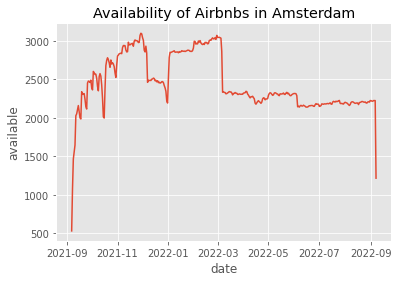

In [89]:
# Make line graph for availability in these dates
plt.style.use('ggplot')
sns.lineplot(data=avail, x="date", y="available")
plt.title("Availability of Airbnbs in Amsterdam")
plt.show()

# 4.1.3 Calendar Plot

In [90]:
# We have to do this again because for calmap to work the index must be the dates
calendar_df = amst.groupby("date").sum()

(<Figure size 792x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88e942ae20>,
       dtype=object))

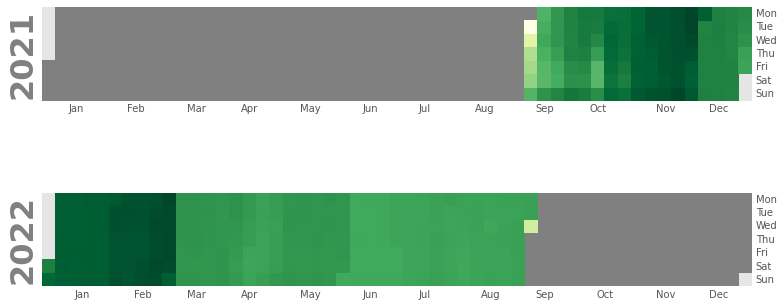

In [91]:
# Create calendar plot
calmap.calendarplot(calendar_df['available'], monthticks=3,
                    cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(11, 6)))

# 4.2 Correlation Coefficient and Plot

In [92]:
# Calculate the mean price per day
mean_price = amst[amst["available"]].groupby("date").mean()["price"]

In [93]:
# Add mean price per day column to the available df
avail["Avg price per day"] = mean_price.values
avail.head()

,date,available,Avg price per day
0,2021-09-07,529,229.156900
1,2021-09-08,1075,213.856744
2,2021-09-09,1466,208.165075
3,2021-09-10,1551,226.047711
4,2021-09-11,1646,223.155529


In [94]:
# Calculate the correlation coefficient
cor = avail['available'].corr(avail['Avg price per day'])
str(cor)

'-0.435003909492511'

In [95]:
avail.head()

,date,available,Avg price per day
0,2021-09-07,529,229.156900
1,2021-09-08,1075,213.856744
2,2021-09-09,1466,208.165075
3,2021-09-10,1551,226.047711
4,2021-09-11,1646,223.155529


Text(0.5, 1.0, 'Prices vs. Available Airbnbs in Amsterdam')

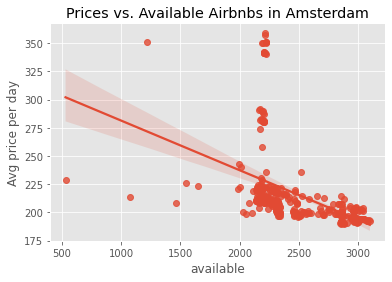

In [96]:
# I chose to create an lmplot, because it shows the regression line clearly
# I also chose to flip the axes from the example, to follow the convention that independent variables (here, the available airbnbs) should go on the x axis and dependent (price) on y.
sns.regplot(x="available", y="Avg price per day", data=avail).set_title("Prices vs. Available Airbnbs in Amsterdam")

Answer: As expected, there is a relatively strong (-0.43) negative correlation between the number of available listings and the price. This follows the general economic rule of supply and demand: when customers have a lot of places to choose from, prices go down to entice them; when there are few places available, owners can afford to hike up prices. There are, however, many outliers which are skewing the results.

Comment: I think there are a couple of errors in the Project Guide in this exercise. The correlation in the example graph is positive, despite the clear negative relationship shown between the two in the Berlin graph (clearer than in my Amsterdam one, in fact). The two datapoints with zero available listings per day (which should probably be removed) may be skewing things, but even then, the positive number seems weird. More importantly, the available airbnbs are not averages, but the actual number of places available per day.

# 4.3 Visualize individual Airbnb Offers with the Listings Data Set

In [97]:
#Load Amsterdam Listings information into a dataframe
listings = pd.read_csv("https://drive.google.com/uc?id=1v_58JtOVR13U6dZLU_TxhaXqi-tbpW_m", compression = "gzip")

In [98]:
# Clean price column
listings["price"] = listings["price"].str.strip("$")
listings["price"] = listings["price"].str.replace(",", "").astype(float)

In [99]:
# Create series with the mean and standard deviation of listings prices grouped by neighborhood, and organize them from least to most expensive
nbh_mean = listings.groupby("neighbourhood_cleansed").mean()['price'].sort_values()
nbh_std = listings.groupby("neighbourhood_cleansed").std()['price']

In [100]:
print(nbh_mean)

neighbourhood_cleansed
Bijlmer-Centrum                            99.164835
Bijlmer-Oost                              100.000000
Osdorp                                    109.210526
Gaasperdam - Driemond                     110.906542
Slotervaart                               116.518625
Bos en Lommer                             124.313641
Noord-West                                129.792570
Oostelijk Havengebied - Indische Buurt    132.504775
Noord-Oost                                132.986784
Geuzenveld - Slotermeer                   138.740000
De Aker - Nieuw Sloten                    139.758621
Buitenveldert - Zuidas                    147.105991
De Baarsjes - Oud-West                    148.981859
Westerpark                                149.757676
Oud-Oost                                  151.798450
Watergraafsmeer                           153.783613
Oud-Noord                                 160.926641
De Pijp - Rivierenbuurt                   163.094159
Zuid                   

In [101]:
print(nbh_std)

neighbourhood_cleansed
Bijlmer-Centrum                            60.699124
Bijlmer-Oost                               78.270223
Bos en Lommer                              65.531987
Buitenveldert - Zuidas                    179.338659
Centrum-Oost                              281.317828
Centrum-West                              231.603435
De Aker - Nieuw Sloten                    139.983951
De Baarsjes - Oud-West                     92.867628
De Pijp - Rivierenbuurt                   197.987659
Gaasperdam - Driemond                     192.598739
Geuzenveld - Slotermeer                   155.011176
IJburg - Zeeburgereiland                  261.286585
Noord-Oost                                 79.739980
Noord-West                                 62.513032
Oostelijk Havengebied - Indische Buurt     87.760628
Osdorp                                     67.881139
Oud-Noord                                 136.648848
Oud-Oost                                  255.152616
Slotervaart            

In [102]:
# Select only the listings from the most expensive and least expensive neighborhoods and assign them to variables
nbh_exp = listings.loc[listings["neighbourhood_cleansed"] == nbh_mean.idxmax()].sort_values("price")
nbh_chp = listings.loc[listings["neighbourhood_cleansed"] == nbh_mean.idxmin()].sort_values("price")

In [103]:
# Let's take a look at these two
print(nbh_chp["price"])
print(nbh_exp["price"])

15069     30.0
15011     30.0
13597     30.0
14343     40.0
7268      40.0
         ...  
11389    198.0
15138    220.0
11927    250.0
1740     250.0
12477    435.0
Name: price, Length: 91, dtype: float64
14900       0.0
14893       0.0
14889       0.0
15433       0.0
6871       20.0
          ...  
12660    1500.0
10458    1886.0
8206     2500.0
14896    6477.0
14897    6477.0
Name: price, Length: 1372, dtype: float64


In [104]:
# The expensive neighborhood has some extreme outliers at the expensive end, and has four listings costing 0 (most likely a mistake).
# Let's remove the faulty zeroes and the 5 most expensive listings.
nbh_exp_adj = nbh_exp["price"][4:-5]

Even with the adjusted prices in the most expensive neighborhood, in my opinion the range of prices between the two is so different that it would be better to create separate box plots, since the axis with price ranges that would fit the expensive neighborhood would end up dwarfing the box plot of the cheap neighborhood. The vast difference between the number of listings in each neighborhood (91 vs 1372) also makes a direct comparison between them rather misleading.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price distribution in Bijlmer-Centrum (in €)')

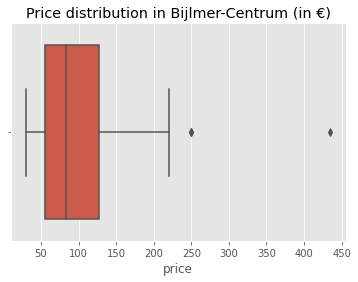

In [105]:
# Boxplot for cheapest neighborhood
sns.boxplot(nbh_chp.price).set_title('Price distribution in Bijlmer-Centrum (in €)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price distribution in Centrum-Oost (in €)')

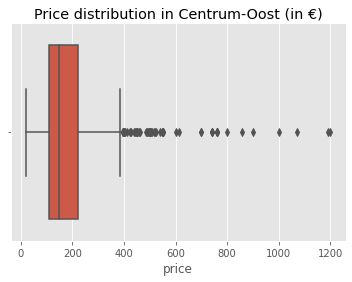

In [106]:
# Boxplot for most expensive neighborhood 
sns.boxplot(nbh_exp_adj).set_title('Price distribution in Centrum-Oost (in €)')

# 4.4 Analyzing Number of Reviews per Neighborhood

Comment: I saw that in the listings dataset there actually already is a column "number_of_reviews". I went through the trouble of testing both ways of calculating the reviews and saw that the results were the same, so in the interest of following the principles of good code (be as simple and as readable as possible), I will not use the reviews dataset. I hope you will admire my attentiveness rather than think I'm being lazy! I really did the other work, but it ultimately made the code messier for no reason, so I deleted it.

In [107]:
# In the listings dataset there actually already is a column number_of_reviews! I'm already adding the other columns that'll be needed for 4.5
rev_listings = listings[["id", "neighbourhood_cleansed", "number_of_reviews", "price", "room_type", "review_scores_rating", "latitude", "longitude"]]

In [108]:
rev_listings

,id,neighbourhood_cleansed,number_of_reviews,price,room_type,review_scores_rating,latitude,longitude
0,2818,Oostelijk Havengebied - Indische Buurt,280,59.0,Private room,4.89,52.364350,4.943580
1,20168,Centrum-Oost,339,106.0,Private room,4.44,52.364070,4.893930
2,25428,Centrum-West,5,125.0,Entire home/apt,5.00,52.374900,4.884870
3,27886,Centrum-West,223,141.0,Private room,4.95,52.387610,4.891880
4,28871,Centrum-West,353,75.0,Private room,4.87,52.367750,4.890920
...,...,...,...,...,...,...,...,...
16111,52001423,De Baarsjes - Oud-West,1,100.0,Entire home/apt,5.00,52.359864,4.856234
16112,52016670,Oud-Oost,0,258.0,Entire home/apt,NaN,52.358310,4.905953
16113,52018685,Centrum-West,0,179.0,Entire home/apt,NaN,52.365632,4.881139
16114,52050333,Noord-Oost,0,88.0,Private room,NaN,52.420204,5.066508


# 4.4.1 Your First Barplot

In [109]:
# Select the top 200 most reviewed places
top200 = rev_listings.sort_values('number_of_reviews', ascending = False)[:200]

In [110]:
# Group top 200 places by neighborhood
nbh_rev = top200.groupby("neighbourhood_cleansed", as_index=False).sum().sort_values('number_of_reviews', ascending=True)

In [111]:
nbh_rev

,neighbourhood_cleansed,id,number_of_reviews,price,review_scores_rating,latitude,longitude
10,Geuzenveld - Slotermeer,685990,299,55.0,4.80,52.382960,4.837860
9,Gaasperdam - Driemond,4459764,307,85.0,4.62,52.314190,4.994100
1,Bijlmer-Oost,2942229,325,65.0,4.80,52.326130,4.977480
0,Bijlmer-Centrum,1149380,397,46.0,4.69,52.317740,4.946470
3,Buitenveldert - Zuidas,7049359,605,172.0,9.35,104.674980,9.746230
15,Osdorp,1814121,789,93.0,4.73,52.367090,4.793320
6,De Aker - Nieuw Sloten,4195067,796,196.0,9.63,104.686005,9.586863
19,Watergraafsmeer,11323672,856,135.0,9.64,104.678640,9.831030
2,Bos en Lommer,24368367,910,211.0,13.96,157.132450,14.558640
11,IJburg - Zeeburgereiland,18565890,1046,180.0,14.39,157.071580,14.974960


Text(0.5, 0, 'Number of Reviews')

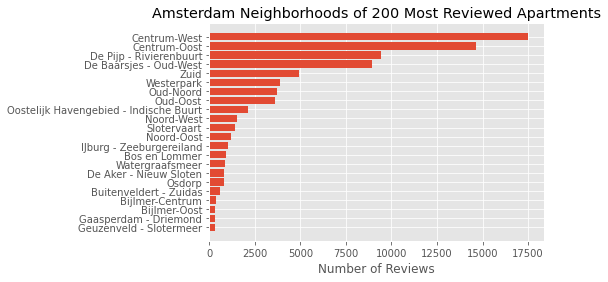

In [112]:
plt.barh(nbh_rev["neighbourhood_cleansed"], nbh_rev["number_of_reviews"])
plt.title("Amsterdam Neighborhoods of 200 Most Reviewed Apartments")
plt.xlabel("Number of Reviews")

# 4.5 Visualization with Maps

In [113]:
# Map 1: Let's see where the top 200 most reviewed Airbnbs in Amsterdam are located
m1 = folium.Map(
    location=[52.36, 4.90],  # Amsterdam Coordinates
    zoom_start=11.2,
    tiles='Stamen Toner'  # Map Style
)

In [114]:
# Use a for-loop to plot circles
for idx, row in top200.iterrows() :
    folium.Circle(
    radius=50,
    location=[row['latitude'], row['longitude']],
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m1)

In [115]:
m1  # Displays the map

In [116]:
# Map 2: Let's see use pins with the most important information about each of those 200 places
m2 = folium.Map(
    location=[52.36, 4.90],  # Amsterdam Coordinates
    zoom_start=11.2,
    tiles='Stamen Toner'  # Map Style
)

def text(row):
  t = 'price: '+ str(row['price']) + '\ntype: '+ row['room_type'] + '\nscore: '+ str(row['review_scores_rating']) +'\nreviews: '+ str(row['number_of_reviews'])         
  return t 

In [117]:
# Use a for-loop to plot circles
for idx, row in top200.iterrows() :
    folium.Marker(
    [row['latitude'], row['longitude']], 
    popup= text(row), 
    tooltip='click me!'
).add_to(m2)

In [118]:
m2  # Displays the map

In [119]:
# Map # 3
m3 = folium.Map(
    location=[52.36, 4.90],  # Amsterdam Coordinates
    zoom_start=11.2,
    tiles='Stamen Toner'  # Map Style
)

points = list(zip(top200.latitude, top200.longitude))
HeatMap(points).add_to(m3)

m3

## 4.6 Surprise Us! (With At Least One More Plot)

Text(0.5, 1.0, 'Price Distribution 200 Most Reviewed Airbnbs in Amsterdam (in €)')

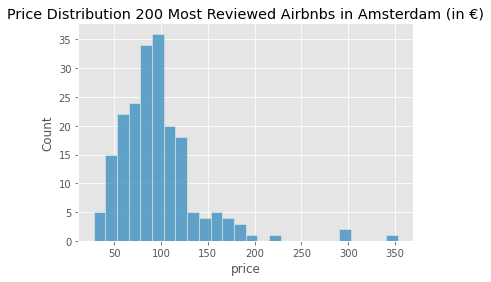

In [120]:
# Let's see the price distribution of the top 200 most reviewed places
sns.histplot(top200["price"]).set_title('Price Distribution 200 Most Reviewed Airbnbs in Amsterdam (in €)')

# 5 Price prediction

In [121]:
# For the price prediction, we'll need to transform/clean the listings database a bit so that things are calculable
# remove % and turn into float: 
#host_response_rate 
listings["host_response_rate"] = listings["host_response_rate"].str.strip("%").astype(float)
# host_acceptance_rate
listings["host_acceptance_rate"] = listings["host_acceptance_rate"].str.strip("%").astype(float)

In [122]:
# Turn t/f into boolean: (I don't know why the astype(bool) was necessary in the first three, it must be because there are empty values or different things in addition to t/f)
# host_is_superhost
listings["host_is_superhost"] = listings["host_is_superhost"].replace("f", False).replace("t", True).astype(bool)
# host_has_profile_pic
listings["host_has_profile_pic"] = listings["host_has_profile_pic"].replace("f", False).replace("t", True).astype(bool)
# host_identity_verified
listings["host_identity_verified"] = listings["host_identity_verified"].replace("f", False).replace("t", True).astype(bool)
# instant_bookable
listings["instant_bookable"] = listings["instant_bookable"].replace("f", False).replace("t", True)

In [123]:
# Let's turm room_type into a category so we can calculate correlation with price. This is a bit tricky to put into a correlation, but I'll try and order it in the likely direction of size/price
room_categories = {"Shared room": 0, "Hotel room": 1, "Private room": 2, "Entire home/apt": 3}
listings["room_type_category"] = listings["room_type"]
listings["room_type_category"] = [room_categories[item] for item in listings["room_type"]]
listings["room_type_category"].astype("category")

0        2
1        2
2        3
3        2
4        2
        ..
16111    3
16112    3
16113    3
16114    2
16115    3
Name: room_type_category, Length: 16116, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [124]:
# Let's select only the columns with numerical datatypes
listings_num = listings.select_dtypes(include=['number', 'bool'])
listings_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16116 entries, 0 to 16115
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16116 non-null  int64  
 1   scrape_id                                     16116 non-null  int64  
 2   host_id                                       16116 non-null  int64  
 3   host_response_rate                            5036 non-null   float64
 4   host_acceptance_rate                          5171 non-null   float64
 5   host_is_superhost                             16116 non-null  bool   
 6   host_listings_count                           16111 non-null  float64
 7   host_total_listings_count                     16111 non-null  float64
 8   host_has_profile_pic                          16116 non-null  bool   
 9   host_identity_verified                        16116 non-null 

The columns with latitude and longitude make little sense to test correlations directly. Distance to the city center, however, is likely to be highly correlated with price. Let's create a new column with distance in Km to the city center to test this.

In [125]:
# First we create a column with the latitute and longitude as points
listings_num["point"] = listings_num.apply(lambda row: Point(latitude=row['latitude'], longitude=row['longitude']), axis=1)

<ipython-input-125-b12fb2fefebc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_num["point"] = listings_num.apply(lambda row: Point(latitude=row['latitude'], longitude=row['longitude']), axis=1)


In [126]:
# Another column with the city center(the coordinates we used for the maps in 4.5)
listings_num["center"] = listings_num.apply(lambda row: Point(latitude=52.3676, longitude=4.9041), axis=1)

<ipython-input-126-3440a9bd39d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_num["center"] = listings_num.apply(lambda row: Point(latitude=52.3676, longitude=4.9041), axis=1)


In [127]:
# And then a column calculating the geodesic distance between the two coordinates
listings_num["distance_to_center_in_km"] = listings_num.apply(lambda row: distance(row['point'], row['center']).km, axis=1)

<ipython-input-127-99b2ef4c0324>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_num["distance_to_center_in_km"] = listings_num.apply(lambda row: distance(row['point'], row['center']).km, axis=1)


Text(0.5, 1.0, 'Airbnb Features Correlating with Price')

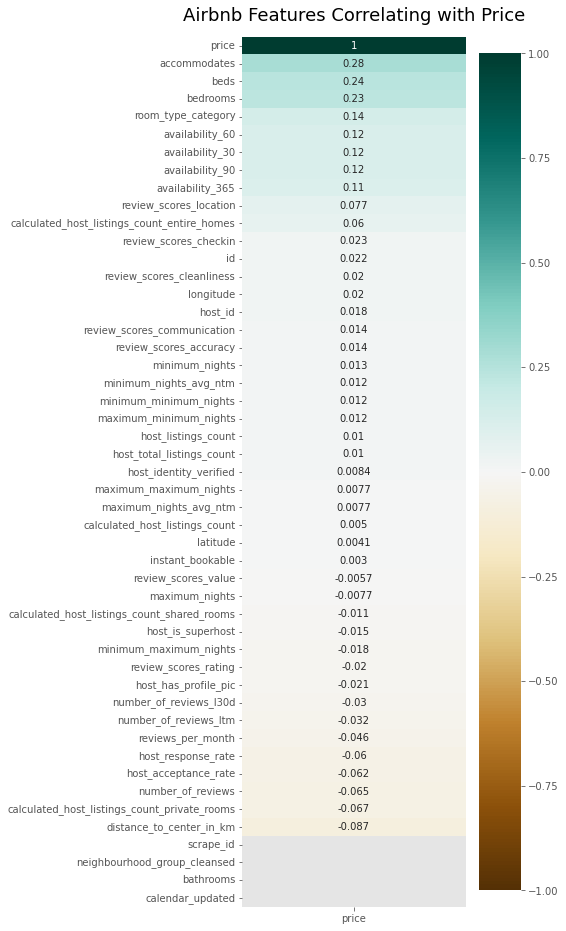

In [128]:
#Let's create a correlation heatmap between the different features and airbnb price
plt.figure(figsize=(5, 16))
heatmap = sns.heatmap(listings_num.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Airbnb Features Correlating with Price', fontdict={'fontsize':18}, pad=16)

These numbers are not very promising for our prediction model! Particularly depressing that the distance to the city center has such a low correlation, given how much work it was to add that column...

Let's choose the categories that are most likely to have a true correlation and then clean things up a bit.

# 5.1 Examine Correlation Between the Variables (train)

In [129]:
listings_num_clean = listings_num[["id", "price", "accommodates", "distance_to_center_in_km", "room_type_category", "number_of_reviews", "availability_60"]]
listings_num_clean = listings_num_clean.set_index("id")

In [130]:
listings_num_clean

,price,accommodates,distance_to_center_in_km,room_type_category,number_of_reviews,availability_60
id,,,,,,
2818,59.0,2,2.713449,2,280,28
20168,106.0,2,0.796360,2,339,0
25428,125.0,3,1.541174,3,5,1
27886,141.0,2,2.377028,2,223,20
28871,75.0,2,0.897897,2,353,27
...,...,...,...,...,...,...
52001423,100.0,3,3.372339,3,1,38
52016670,258.0,4,1.041459,3,0,22
52018685,179.0,4,1.579235,3,0,3


Now let's investigate why those correlatios were so low.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


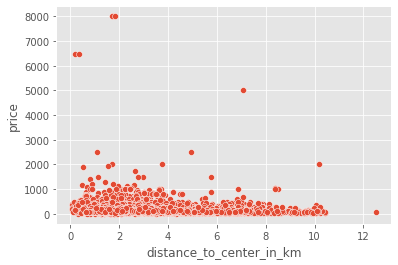

In [131]:
# Scatter plot for the relationship between distance to city center and price to see if anything weird is going on
sns.scatterplot(listings_num_clean['distance_to_center_in_km'], listings_num_clean['price'])

In [132]:
# I think we really need to take out the outliers because they are warping things. This removes prices that are above 3 standard deviations from the mean price
listings_num_clean = listings_num_clean[(np.abs(stats.zscore(listings_num_clean["price"])) < 3)]

In [133]:
print(listings_num_clean.shape) # We removed 112 columns, so 0.69% of our original listings. Seems ok

(16004, 6)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


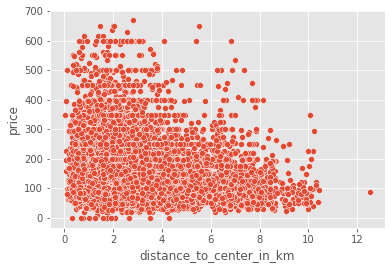

In [134]:
sns.scatterplot(listings_num_clean['distance_to_center_in_km'], listings_num_clean['price']) # That looks more like it

Text(0.5, 1.0, 'Airbnb Features Correlating with Price')

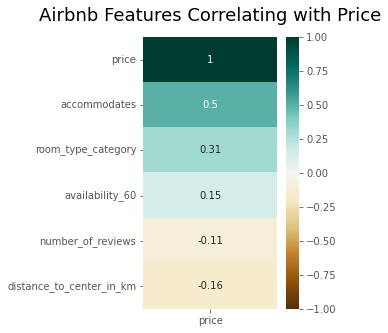

In [135]:
# Let's check those correlations again
plt.figure(figsize=(3, 5))
heatmap = sns.heatmap(listings_num_clean.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Airbnb Features Correlating with Price', fontdict={'fontsize':18}, pad=16)

# 5.2 First Predictions with Simple Regression Models (train)

In [136]:
# Assign X to the independent variable and y to the dependent variable. Use double brackets so they are dataframes and we don't need to reshape
X1 = listings_num_clean[["accommodates"]]
y1 = listings_num_clean[["price"]]

In [137]:
# Split the dataset into training and testing. Random state sets a seed for the random number generator, so that the 70/30 split is consistent every time
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state= 20)

In [138]:
# Let's train the 1st model
clf = LinearRegression()
clf.fit(X1_train,y1_train)

LinearRegression()

# 5.3 From Training to Testing – Making Predictions

In [139]:
# And now let's predict
pred1 = clf.predict(X1_test)
pred1

array([[122.37386459],
       [122.37386459],
       [155.65258925],
       ...,
       [222.21003855],
       [188.9313139 ],
       [122.37386459]])

In [140]:
# Check accuracy score
clf.score(X1_test,y1_test) # 24%, pretty bad!

0.24664014235926246

In [141]:
#Find the Root Mean Square Error (RMSE) for the first prediction 
rmse1 = mean_squared_error(y1_test, pred1, squared=False)
rmse1

69.04228759425473

Now we must train the model with the other variables. 

In [142]:
# Assign X2 to the independent variables and y2 to the dependent variable
X2 = listings_num_clean[["accommodates", "distance_to_center_in_km", "room_type_category", "number_of_reviews", "availability_60"]]
y2 = listings_num_clean[["price"]]

In [143]:
# Split the dataset into training and testing. Random state sets a seed for the random number generator, so that the 70/30 split is consistent every time
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state= 20)

In [144]:
# Train the model
clf.fit(X2_train,y2_train)

LinearRegression()

In [145]:
# And now let's predict
pred2 = clf.predict(X2_test)

In [146]:
# Accuracy test 2
clf.score(X2_test, y2_test) # 37%, a definite improvement, but still quite bad

0.37876099279856323

In [147]:
# Find the Root Mean Square Error (RMSE) for the second prediction 
rmse2 = mean_squared_error(y2_test, pred2, squared=False)
rmse2

62.69649943792696

It's indeed a little lower, but not by much. It's quite a large error given the range of prices we are dealing with...